In [45]:
import pickle
import matplotlib.pyplot as plt
import math
import numpy as np
import os

import plotTools as pt

plt.rcParams.update({"text.usetex": True,"font.family": "serif"})
plt.rcParams['mathtext.rm'] = 'serif'

cosmoParamsPretty = {'omega_c_h2' : '$\Omega_ch^2$', \
                         'omega_b_h2' :    '$\Omega_bh^2$', \
                         'N_eff':   '$N_{eff}$', \
                         'A_s' :  '$A_s$', \
                         'n_s' : '$n_s$', \
                         'tau' :  r'$\tau$', \
                         'theta_s': r'$\theta_s$', \
                         'mnu' : r'$m_\nu$', \
                         'Yhe' : r'$Y_{He}$', \
                        'f_cdi': '$f_{cdi}$', \
                        'n_cdi': '$n_{cdi}$', \
                        'c_ad_cdi': '$c_{ad\;\;cdi}$', \
                        'r': '$r$', \
                        'H0': '$H_0$', \
                        'varying_alpha': r'$\delta \alpha$', \
                        'varying_me': '$\delta m_e$', \
                        'thetai_scf' : r'$\theta_i$', \
                        'log10z_c' : r'$\textrm{log}_{10}(z_c)$', \
                        'fEDE' : r'$f_{\textrm{EDE}}$', \
                        'omk' : r'$\Omega_k$', \
                        'N_idr':   r'$N_{\textrm{idr}}$', \
                        'Gamma_0_nadm':   r'$\Gamma_0$' }

In [49]:
modelOption = "DRDM"
#modelOption = "EDE"
#modelOption = "SIDR"
#modelOption = "varyingConstants"
#modelOption = "varyingConstantsCurvature"

In [50]:
# Model Option
if modelOption == "DRDM": 
    cosmoFid = {'omega_c_h2':0.1197, \
                'omega_b_h2': 0.0222, \
                'N_eff': 3.046, \
                'A_s' : 2.196e-9, \
                'n_s' : 0.9655,\
                'tau' : 0.06, \
                'H0' : 67.5, \
                'mnu' : 0.06, \
                'N_idr': 0.4290, \
                'Gamma_0_nadm': 2.371e-8}

    jobNameLCDM = 'CLASS_delens/results/fisher_LCDM_DRDM'
    jobNamePlanck = 'CLASS_delens/results/fisher_Planck_DRDM'
    baoFile = 'CLASS_delens/results/fisher_CLASSBAO_DRDM.txt'
    output = './outputs/output_DRDM/'

    maxParamsToFix = ['omega_c_h2','omega_b_h2','N_eff','A_s','n_s','mnu','H0','N_idr','Gamma_0_nadm']
    mustbeunfixed = ['H0','omega_c_h2','omega_b_h2','A_s','n_s']
    mustbefixed = ['N_eff','mnu']
    
if modelOption == "EDE": 
    cosmoFid = {'omega_c_h2':0.1197, \
                'omega_b_h2': 0.0222, \
                'N_eff': 3.046, \
                'A_s' : 2.196e-9, \
                'n_s' : 0.9655,\
                'tau' : 0.06, \
                'H0' : 67.5, \
                'mnu' : 0.06, \
                'fEDE' : 0.098, \
                'log10z_c' : 3.63, \
                'thetai_scf' : 2.58}

    jobNameLCDM = 'CLASS_delens/results/fisher_LCDM_EDE'
    jobNamePlanck = 'CLASS_delens/results/fisher_Planck_EDE'
    baoFile = 'CLASS_delens/results/fisher_CLASSBAO_EDE.txt'
    output = './outputs/output_EDE/'

    maxParamsToFix = ['omega_c_h2','omega_b_h2','N_eff','A_s','n_s','mnu','H0','fEDE','log10z_c','thetai_scf']
    mustbeunfixed = ['H0','omega_c_h2','omega_b_h2','A_s','n_s']
    mustbefixed = ['N_eff','mnu']
    
if modelOption == "SIDR": 
    cosmoFid = {'omega_c_h2':0.1197, \
                'omega_b_h2': 0.0222, \
                'N_eff': 3.046, \
                'A_s' : 2.196e-9, \
                'n_s' : 0.9655,\
                'tau' : 0.06, \
                'H0' : 67.5, \
                'mnu' : 0.06, \
                'N_idr': 0.3867}

    jobNameLCDM = 'CLASS_delens/results/fisher_LCDM_SIDR'
    jobNamePlanck = 'CLASS_delens/results/fisher_Planck_SIDR'
    baoFile = 'CLASS_delens/results/fisher_CLASSBAO_SIDR.txt'
    output = './outputs/output_SIDR/'

    maxParamsToFix = ['omega_c_h2','omega_b_h2','N_eff','A_s','n_s','mnu','H0','N_idr']
    mustbeunfixed = ['H0','omega_c_h2','omega_b_h2','A_s','n_s']
    mustbefixed = ['N_eff','mnu']
    
if modelOption == "varyingConstants": 
    cosmoFid = {'omega_c_h2':0.1197, \
                'omega_b_h2': 0.0222, \
                'N_eff': 3.046, \
                'A_s' : 2.196e-9, \
                'n_s' : 0.9655,\
                'tau' : 0.06, \
                'H0' : 67.5, \
                'mnu' : 0.06, \
                'varying_alpha' : 1., \
                'varying_me' : 1.}

    jobNameLCDM = 'CLASS_delens/results/fisher_LCDM_varyingConstants'
    jobNamePlanck = 'CLASS_delens/results/fisher_Planck_varyingConstants'
    baoFile = 'CLASS_delens/results/fisher_CLASSBAO_varyingConstants.txt'
    output = './outputs/output_varyingConstants/'

    maxParamsToFix = ['omega_c_h2','omega_b_h2','N_eff','A_s','n_s','mnu','varying_alpha','varying_me','H0']
    mustbeunfixed = ['H0','omega_c_h2','omega_b_h2','A_s','n_s']
    mustbefixed = ['N_eff','mnu']
    
if modelOption == "varyingConstantsCurvature": 
    cosmoFid = {'omega_c_h2':0.1197, \
                'omega_b_h2': 0.0222, \
                'N_eff': 3.046, \
                'A_s' : 2.196e-9, \
                'n_s' : 0.9655,\
                'tau' : 0.06, \
                'H0' : 67.5, \
                'mnu' : 0.06, \
                'varying_alpha' : 1., \
                'varying_me' : 1. , \
                'omk' : -0.0089719}

    jobNameLCDM = 'CLASS_delens/results/fisher_LCDM_varyingConstantsCurvature'
    jobNamePlanck = 'CLASS_delens/results/fisher_Planck_varyingConstantsCurvature'
    baoFile = 'CLASS_delens/results/fisher_CLASSBAO_varyingConstantsCurvature.txt'
    output = './outputs/output_varyingConstantsCurvature/'

    maxParamsToFix = ['omega_c_h2','omega_b_h2','N_eff','A_s','n_s','mnu','varying_alpha','varying_me','H0','omk']
    mustbeunfixed = ['H0','omega_c_h2','omega_b_h2','A_s','n_s']
    mustbefixed = ['N_eff','mnu']
    
    
fixingParams = maxParamsToFix
columnParameters = [x for x in maxParamsToFix if x not in mustbefixed]

In [37]:
def fisherPlots_LCDM(bao, jobNameLCDM, jobNamePlanck, baoFile, paramsToFix, cosmoParamsPretty, output, paramsToPlot, wantTable):
    pythonFlag = 3
    
    nExps = 20
    sTypes = ["lensed","delensed","unlensed"]
    gTypes = ["NonGaussian","Gaussian"]
    noiseLevelsHi = np.arange(0.5, 10.5, 0.5)
    fsky=0.5

    fishersLCDM, cosmoParams1 = pt.loadGaussianNG(jobName = jobNameLCDM, pythonFlag = pythonFlag, \
                                      returnCosmoParams = True, gTypes = gTypes)

    fishersPlanck, cosmoParamsPlanck = pt.loadGaussianNG(jobName = jobNamePlanck, pythonFlag = pythonFlag, \
                                                        returnCosmoParams = True, gTypes = gTypes)

    # fisher + fix + fsky + tau -> invert

    for i in range(0,20):
        for gt, gaussianType in enumerate(gTypes):
            for st, spectrumType in enumerate(sTypes):

                fisher = fishersLCDM[gaussianType][spectrumType][i]
                fishersLCDM[gaussianType][spectrumType][i], fixedParamsLCDM = pt.fixParameters(fisher = fisher,\
                                                                                   cosmoParams = cosmoParams1,\
                                                                                   paramsToFix = paramsToFix,\
                                                                                   returnFixedParamList = True)

    for i in range(0,1):
        for gt, gaussianType in enumerate(gTypes):
            for st, spectrumType in enumerate(sTypes):           
                fisher = fishersPlanck[gaussianType][spectrumType][i]
                fishersPlanck[gaussianType][spectrumType][i], fixedParamsPlanck = pt.fixParameters(fisher = fisher, \
                                                                                                          cosmoParams = cosmoParamsPlanck, \
                                                                                                          paramsToFix = paramsToFix, \
                                                                                                          returnFixedParamList = True)

    fishersSkyLCDM = pt.addfsky(fishersLCDM, fsky, gTypes = gTypes)
    fishersSkyPlanck = pt.addfsky(fishersPlanck, 0.44, gTypes = gTypes)

    fishersTauLCDM = pt.addTau(fishersSkyLCDM, fixedParamsLCDM, gTypes = gTypes)
    fishersTauPlanck = pt.addTau(fishersSkyPlanck, fixedParamsPlanck, gTypes = gTypes)

    if bao == 1:
        fishersBAOLCDM = pt.addBAO(fishersTauLCDM, fixedParamsLCDM, gTypes = gTypes, baoFile = baoFile)
        fishersBAOPlanck = pt.addBAO(fishersTauPlanck, fixedParamsPlanck, gTypes = gTypes, baoFile = baoFile)

        sigmasLCDM = pt.invertFishers(fishersBAOLCDM, gTypes = gTypes)
        sigmasPlanck = pt.invertFishers(fishersBAOPlanck, gTypes = gTypes)
    else:
        sigmasLCDM = pt.invertFishers(fishersTauLCDM, gTypes = gTypes)
        sigmasPlanck = pt.invertFishers(fishersTauPlanck, gTypes = gTypes)

    FOMsLCDM = pt.getFOMs(sigmasLCDM, gTypes = gTypes)
    FOMsPlanck = pt.getFOMs(sigmasPlanck, gTypes = gTypes)

    FOMref = FOMsPlanck['NonGaussian']['lensed'][0]
    
    if wantTable == 1:
        toPlot1g = np.zeros(nExps)
        toPlot1ng = np.zeros(nExps)
        toPlot1max = np.zeros(nExps)
        
        metric_dictionary = { }

        for cp, cosmo in enumerate(paramsToPlot):
            paramInd = fixedParamsLCDM.index(cosmo)

            for st, spectrumType in enumerate(sTypes):
                for gt, gaussianType in enumerate(gTypes):
                    for ei in range(0,nExps):
                        toPlot1ng[ei] = math.sqrt(np.diag(sigmasLCDM['NonGaussian'][spectrumType][ei])[paramInd])
                        toPlot1g[ei] = math.sqrt(np.diag(sigmasLCDM['NonGaussian'][spectrumType][ei])[paramInd])
                        toPlot1max[ei] = max(toPlot1g[ei],toPlot1ng[ei])
                    if gaussianType == 'NonGaussian':
                        if spectrumType == 'unlensed':
                            unlensed_graph = list(toPlot1g)
                        else:
                            if spectrumType == 'lensed':
                                lensed_graph = list(toPlot1ng)
                            else:
                                delensed_graph = list(toPlot1max)

            #delensed_error = 0
            #lensed_error = 0
            #for x in range(len(unlensed_g)):
            #    delensed_error += (100/len(unlensed_g)) * ((delensed_g[x] - unlensed_g[x]) / np.abs(unlensed_g[x])) #Percent change from unlensed to delensed
            #    lensed_error += (100/len(unlensed_g)) * ((lensed_g[x] - unlensed_g[x]) / np.abs(unlensed_g[x])) #Percent change from unlensed to lensed
            #delensed_improvement = lensed_error - np.maximum(delensed_error,0)
            
            #Difference between lensed and delensed error on the parameters.
            #This is computed by subtracting the percent change of unlensed error to delensed error (set to 0 when negative) from the percent change of unlensed to lensed error.
            
            #delensed_reduction = 0
            #for x in range(len(unlensed_g)):
            #    delensed_reduction += (100/len(unlensed_g)) * (lensed_g[x] - delensed_g[x])/(lensed_g[x])
            
            #print(paramsToPlot[cp])
            #print("Delensed Error:" + str(delensed_error))
            #print("Lensed Error  :" + str(lensed_error))
            #print("Improvement   :" + str(delensed_improvement))
            #print("New Improvement   :" + str(delensed_reduction))
            
            # Percent Improvement ~ 1 uK-arcmin (CMB-S4)
            delensed_improvement = 100 * (1 - delensed_graph[10]/lensed_graph[10])
            metric_dictionary[paramsToPlot[cp]] = {'delensed_improvement': delensed_improvement }
            
        return metric_dictionary
    else:
        plt.figure('figure of merit',  figsize = (8,4))
        plt.clf()

        ax = plt.subplot()

        toPlot1g = np.zeros(nExps)
        toPlot1ng = np.zeros(nExps)

        plt.margins(0.0,0.05)

        for st, spectrumType in enumerate(sTypes):
            for gt, gaussianType in enumerate(gTypes):
                linestyles = ['--', '-', '-.']
                widths = [2, 2]
                colors = ['C9', 'C8', 'C6']

                for ei in range(0,nExps):
                    toPlot1g[ei] = FOMsLCDM['Gaussian'][spectrumType][ei]/FOMref
                    toPlot1ng[ei] = FOMsLCDM['NonGaussian'][spectrumType][ei]/FOMref
                    if spectrumType == 'lensed':
                        legendLabel = 'Lensed'
                    elif spectrumType == 'delensed':
                        legendLabel = 'Delensed'
                    else:
                        legendLabel = spectrumType

                if gaussianType == 'NonGaussian':
                    if spectrumType == 'unlensed':
                        plt.semilogy(noiseLevelsHi, toPlot1ng, color = colors[st], linestyle = linestyles[0], \
                                 linewidth = widths[0], label = 'Unlensed')
                    else:
                        plt.semilogy(noiseLevelsHi, toPlot1ng, color = colors[st], linestyle = linestyles[1], \
                                 linewidth = widths[0], label = 'Non-Gaussian '+legendLabel)
                if gaussianType == 'Gaussian':
                    if spectrumType == 'lensed':
                        plt.semilogy(noiseLevelsHi, toPlot1g, color = colors[st], linestyle = linestyles[0], \
                        linewidth = widths[0], label = 'Gaussian Lensed')
                    if spectrumType == 'delensed':
                        plt.semilogy(noiseLevelsHi, toPlot1g, color = colors[st], linestyle = linestyles[0], \
                        linewidth = widths[0], label = 'Gaussian Delensed')

        plt.ylabel('$\mathrm{FoM}/\mathrm{FoM}_\mathrm{Planck}$', fontsize = 21)
        plt.xlabel('$\Delta_T$ ($\mu$K-arcmin)', fontsize = 17)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.legend(bbox_to_anchor = (1., 1.), loc = 2, frameon = False, fontsize=16)
        plt.tight_layout()
        #plt.savefig('fig_FoM.pdf')
        if bao == 1:
            if not os.path.exists(output + '/bao/'):
                os.makedirs(output + '/bao/')
            plt.savefig(output + '/bao/fig-FoM.pdf', bbox_inches = 'tight')
            plt.savefig(output + '/bao/fig-FoM.png', bbox_inches = 'tight')
        else:
            if not os.path.exists(output + '/no_bao/'):
                os.makedirs(output + '/no_bao/')
            plt.savefig(output + '/no_bao/fig-FoM.pdf', bbox_inches = 'tight')
            plt.savefig(output + '/no_bao/fig-FoM.png', bbox_inches = 'tight')
        #plt.show()
        
        sTypes = ["lensed","delensed","unlensed"]
        gTypes = ["NonGaussian","Gaussian"]

        for cp, cosmo in enumerate(paramsToPlot):
            plt.figure('param constraints',  figsize = (4,4))
            plt.clf()

            toPlot1g = np.zeros(nExps)
            toPlot1ng = np.zeros(nExps)
            toPlot1max = np.zeros(nExps)
            
            paramInd = fixedParamsLCDM.index(cosmo)

            ax = plt.subplot(1, 1, 1)
            ax.margins(0.0,0.05)

            for st, spectrumType in enumerate(sTypes):
                for gt, gaussianType in enumerate(gTypes):
                    linestyles = ['--', '-', '-.']
                    widths = [2, 2]
                    colors = ['C9', 'C8', 'C6']

                    for ei in range(0,nExps):
                        toPlot1g[ei] = math.sqrt(np.diag(sigmasLCDM['Gaussian'][spectrumType][ei])[paramInd])
                        toPlot1ng[ei] = math.sqrt(np.diag(sigmasLCDM['NonGaussian'][spectrumType][ei])[paramInd])
                        toPlot1max[ei] = max(toPlot1g[ei],toPlot1ng[ei])
                        if spectrumType == 'lensed':
                            legendLabel = 'Lensed'
                        elif spectrumType == 'delensed':
                            legendLabel = 'Delensed'
                        else:
                            legendLabel = spectrumType

                    if gaussianType == 'NonGaussian':
                        if spectrumType == 'unlensed':
                            plt.plot(noiseLevelsHi, toPlot1g, color = colors[st], linestyle = linestyles[0], \
                                     linewidth = widths[0], label = 'Unlensed')
                        if spectrumType == 'delensed':
                        #    plt.plot(noiseLevelsHi, toPlot1ng, color = colors[st], linestyle = linestyles[1], \
                        #    linewidth = widths[0], label = 'Non-Gaussian Delensed')
                            plt.plot(noiseLevelsHi, toPlot1max, color = colors[st], linestyle = linestyles[1], \
                            linewidth = widths[0], label = 'Delensed')
                        if spectrumType == 'lensed':
                        #    plt.plot(noiseLevelsHi, toPlot1ng, color = colors[st], linestyle = linestyles[1], \
                        #    linewidth = widths[0], label = 'Non-Gaussian Lensed')
                            plt.plot(noiseLevelsHi, toPlot1ng, color = colors[st], linestyle = linestyles[1], \
                            linewidth = widths[0], label = 'Lensed')
                    #if gaussianType == 'Gaussian':
                        #if spectrumType == 'lensed':
                        #    plt.plot(noiseLevelsHi, toPlot1g, color = colors[st], linestyle = linestyles[0], \
                        #    linewidth = widths[0], label = 'Gaussian Lensed')
                        #if spectrumType == 'delensed':
                        #    plt.plot(noiseLevelsHi, toPlot1g, color = colors[st], linestyle = linestyles[0], \
                        #    linewidth = widths[0], label = 'Gaussian Delensed')
                        #if spectrumType == 'unlensed':
                        #    plt.plot(noiseLevelsHi, toPlot1g, color = colors[st], linestyle = linestyles[0], \
                        #    linewidth = widths[0], label = 'Gaussian Unlensed')

                ymin, ymax = plt.ylim()
                plt.ylim(ymin=0.0, ymax = ymax*1.05)
            plt.ylabel('$\sigma($' + cosmoParamsPretty[cosmo] + '$)$', fontsize = 21)
            plt.xlabel('$\Delta_T$ ($\mu$K-arcmin)', fontsize = 17)
            plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            ax.yaxis.offsetText.set_fontsize(16)
            plt.tight_layout()
            
            if bao == 1:
                if not os.path.exists(output + '/bao/'):
                    os.makedirs(output + '/bao/')
                plt.savefig(output + '/bao/constraints_on_' + paramsToPlot[cp] + '_legendless.pdf', bbox_inches = 'tight')
                plt.savefig(output + '/bao/constraints_on_' + paramsToPlot[cp] + '_legendless.png', bbox_inches = 'tight')
            else:
                if not os.path.exists(output + '/no_bao/'):
                    os.makedirs(output + '/no_bao/')
                plt.savefig(output + '/no_bao/constraints_on_' + paramsToPlot[cp] + '_legendless.pdf', bbox_inches = 'tight')
                plt.savefig(output + '/no_bao/constraints_on_' + paramsToPlot[cp] + '_legendless.png', bbox_inches = 'tight')
                
            plt.rcParams['figure.figsize'] = [8, 4]
            plt.legend(bbox_to_anchor = (1., 1.), loc = 2, frameon = False, fontsize=16)
            if bao == 1:
                if not os.path.exists(output + '/bao/'):
                    os.makedirs(output + '/bao/')
                plt.savefig(output + '/bao/constraints_on_' + paramsToPlot[cp] + '.pdf', bbox_inches = 'tight')
                plt.savefig(output + '/bao/constraints_on_' + paramsToPlot[cp] + '.png', bbox_inches = 'tight')
            else:
                if not os.path.exists(output + '/no_bao/'):
                    os.makedirs(output + '/no_bao/')
                plt.savefig(output + '/no_bao/constraints_on_' + paramsToPlot[cp] + '.pdf', bbox_inches = 'tight')
                plt.savefig(output + '/no_bao/constraints_on_' + paramsToPlot[cp] + '.png', bbox_inches = 'tight')
            #plt.show()
    

In [38]:
def biasPlots(bao, jobNameBias, baoFile, paramsToFix, cosmoParamsPretty, cosmoFid, output, paramsToAvoid = []):
    pythonFlag = 3
    
    fishersBias, cosmoParamsBias = pt.loadGaussianNG(jobName = jobNameBias, pythonFlag = pythonFlag, \
                                                   returnCosmoParams = True, gTypes = ['NonGaussian','Gaussian'])

    fsky = 0.5

    sTypes = ['lensed','delensed','unlensed']
    gTypes = ['NonGaussian','Gaussian']

    fishersBias = pt.addfsky(fishersBias, fsky, gTypes = gTypes)
    fishersBias_tau = pt.addTau(fishersBias, cosmoParamsBias, gTypes = gTypes)

    if bao == 1:
        fishersBias_BAO = pt.addBAO(fishersBias_tau, cosmoParamsBias, gTypes = gTypes, baoFile = baoFile)

        for i in range(2):
            for gt, gaussianType in enumerate(gTypes):
                for st, spectrumType in enumerate(sTypes):
                    fisher = fishersBias_BAO[gaussianType][spectrumType][i]
                    fishersBias_BAO[gaussianType][spectrumType][i], cosmoParamsBias_fixed = pt.fixParameters(fisher = fisher, \
                                                                                cosmoParams = cosmoParamsBias, \
                                                                                paramsToFix = paramsToFix, \
                                                                                returnFixedParamList = True)
        covMatsBias = pt.invertFishers(fishersBias_BAO, sTypes = sTypes, gTypes = gTypes)
    else: 
        for i in range(2):
            for gt, gaussianType in enumerate(gTypes):
                for st, spectrumType in enumerate(sTypes):
                    fisher = fishersBias_tau[gaussianType][spectrumType][i]
                    fishersBias_tau[gaussianType][spectrumType][i], cosmoParamsBias_fixed = pt.fixParameters(fisher = fisher, \
                                                                                cosmoParams = cosmoParamsBias, \
                                                                                paramsToFix = paramsToFix, \
                                                                                returnFixedParamList = True)
        covMatsBias = pt.invertFishers(fishersBias_tau, sTypes = sTypes, gTypes = gTypes)

    sigmasBias = pt.getSigmas(covMatsBias, sTypes = sTypes, gTypes = gTypes)

    from matplotlib.lines import Line2D
    
    cosmoParamsEllipses = cosmoParamsBias_fixed
    
    cosmoParamsWeCareAbout = cosmoParamsEllipses.copy()
    if len(paramsToAvoid) > 0:
        for i in paramsToAvoid:
            if cosmoParamsWeCareAbout.count(i) > 0:
                cosmoParamsWeCareAbout.remove(i)
    nPlots = len(cosmoParamsWeCareAbout)

    plt.clf()
    fig = plt.figure('fisher ellipses', figsize = (nPlots*3,nPlots*3))
    plt.clf()

    eiEllipses = 1 # Defines the noise of figure plots
    expNames = range(2)
    exp = expNames[eiEllipses]
    colors = ['C9', 'C8', 'C6']
    #linestyles = ['-', '--']
    linestyles = ['-', '-','--']

    fs=10
                
    if len(cosmoParamsWeCareAbout) > 0:
        
        for cp1, cosmo1 in enumerate(cosmoParamsWeCareAbout):
            for cp2, cosmo2 in enumerate(cosmoParamsWeCareAbout):
                if (cp1 < cp2):
                    ax = plt.subplot(nPlots, nPlots, nPlots * cp2 + cp1 + 1 )
                    for st, spectrumType in enumerate(['lensed','delensed','unlensed']):
                        for gt, gaussType in enumerate(['NonGaussian']):
                            fi_g = covMatsBias['Gaussian'][spectrumType][exp]
                            fi_ng = covMatsBias['NonGaussian'][spectrumType][exp]
                            fi_max = fi_g.copy()
                            for i in range(len(fi_ng)):
                                for j in range(len(fi_ng[i])):
                                    if fi_ng[i][j] > fi_g[i][j]:
                                        fi_max[i][j] = fi_ng[i][j]
                            #bi = biasesBias[gaussType][spectrumType][exp]

                            paramOneInd = cosmoParamsEllipses.index(cosmo1)
                            paramTwoInd = cosmoParamsEllipses.index(cosmo2)

                            xx_g, yy_g, contourToPlot_g = getContour(fi_g[paramOneInd, paramOneInd], \
                                                                            fi_g[paramTwoInd, paramTwoInd], \
                                                                            fi_g[paramOneInd, paramTwoInd], \
                                                                            cosmoFid[cosmo1], \
                                                                            cosmoFid[cosmo2])
                            xx_ng, yy_ng, contourToPlot_ng = getContour(fi_ng[paramOneInd, paramOneInd], \
                                                                            fi_ng[paramTwoInd, paramTwoInd], \
                                                                            fi_ng[paramOneInd, paramTwoInd], \
                                                                            cosmoFid[cosmo1], \
                                                                            cosmoFid[cosmo2])
                            xx_max, yy_max, contourToPlot_max = getContour(fi_max[paramOneInd, paramOneInd], \
                                                                            fi_max[paramTwoInd, paramTwoInd], \
                                                                            fi_max[paramOneInd, paramTwoInd], \
                                                                            cosmoFid[cosmo1], \
                                                                            cosmoFid[cosmo2])
                            
                            plt.plot(cosmoFid[cosmo1],cosmoFid[cosmo2],color='r',marker='x')

                            if spectrumType == 'unlensed':
                                CS1 = plt.contour(xx_g, yy_g, contourToPlot_g, levels = [2.3], linestyles = [linestyles[2]], linewidths = 2, \
                                            colors = [colors[st]])
                            if spectrumType == 'lensed':
                                CS1 = plt.contour(xx_ng, yy_ng, contourToPlot_ng, levels = [2.3], linestyles = [linestyles[1]], linewidths = 2, \
                                            colors = [colors[st]])
                            if spectrumType == 'delensed':
                                CS1 = plt.contour(xx_max, yy_max, contourToPlot_max, levels = [2.3], linestyles = [linestyles[1]], linewidths = 2, \
                                            colors = [colors[st]])
                            if cp2 == nPlots-1:
                                plt.xlabel(cosmoParamsPretty[cosmo1], fontsize = 16+fs)
                                plt.xticks(fontsize=6+fs)
                                if cosmo1 == 'A_s' and cosmo2 == 'theta_s' and st == 0 and gt == 0:
                                    ax.get_xaxis().get_offset_text().set_visible(False)
                                    ax_max = max(ax.get_xticks())
                                    exponent_axis = np.floor(np.log10(ax_max)).astype(int)
                                    ax.annotate(r'$\times$10$^{%i}$'%(exponent_axis),
                                                 xy=(.64, .02), xycoords='axes fraction', fontsize=6+fs)
                                else:
                                    ax.get_xaxis().get_offset_text().set_visible(False)
                            else:
                                plt.gca().xaxis.set_ticklabels([])
                            if cp1 == 0:
                                plt.ylabel(cosmoParamsPretty[cosmo2], fontsize = 16+fs)
                                plt.yticks(fontsize=6+fs)
                                ax.yaxis.offsetText.set_fontsize(6+fs)
                            else:
                                plt.gca().yaxis.set_ticklabels([])
                            ax.xaxis.set_major_locator(plt.MaxNLocator(2))
                            ax.yaxis.set_major_locator(plt.MaxNLocator(2))

        #custom_lines = [Line2D([0], [0], ls=linestyles[1], color=colors[0], lw=2),
        #                Line2D([0], [0], ls=linestyles[1], color=colors[1], lw=2),
        #                Line2D([0], [0], ls=linestyles[1], color=colors[2], lw=2),
        #                Line2D([0], [0], ls=linestyles[0], color=colors[0], lw=2),
        #                Line2D([0], [0], ls=linestyles[0], color=colors[1], lw=2)]
        custom_lines = [Line2D([0], [0], ls=linestyles[1], color=colors[0], lw=2),
                        Line2D([0], [0], ls=linestyles[1], color=colors[1], lw=2),
                        Line2D([0], [0], ls=linestyles[2], color=colors[2], lw=2)]
        ax = plt.subplot(nPlots, nPlots, nPlots+nPlots-1)
        ax.axis("off")
        #ax.legend(custom_lines, ['Lensed, Bias = 0', 'Delensed, Bias = 0', 'Unlensed', \
        #                         'Lensed, With Bias', 'Delensed, With Bias'], fontsize=12+fs)
        ax.legend(custom_lines, ['Lensed', 'Delensed','Unlensed'], fontsize=12+fs)

        #plt.savefig('fig_baryonbias.pdf', bbox_inches = 'tight')
        if bao == 1:
            if not os.path.exists(output + '/bao/'):
                os.makedirs(output + '/bao/')
            plt.savefig(output + '/bao/fig_baryonbias.pdf', bbox_inches = 'tight')
            plt.savefig(output + '/bao/fig_baryonbias.png', bbox_inches = 'tight')
        else:
            if not os.path.exists(output + '/no_bao/'):
                os.makedirs(output + '/no_bao/')
            plt.savefig(output + '/no_bao/fig_baryonbias.pdf', bbox_inches = 'tight')
            plt.savefig(output + '/no_bao/fig_baryonbias.png', bbox_inches = 'tight')

In [39]:
def getContour(covOneOne, covTwoTwo, covOneTwo, paramOneFid, paramTwoFid, width = 2, num = 100):

    levels = [2.3]
    cov = np.array([[covOneOne, covOneTwo], [covOneTwo, covTwoTwo] ])
    invcov = np.linalg.inv(cov)

    x = np.linspace(paramOneFid - width * np.sqrt(cov[0,0]), \
                        paramOneFid + width * np.sqrt(cov[0,0]), num)
    y = np.linspace(paramTwoFid - width * np.sqrt(cov[1,1]), \
                        paramTwoFid + width * np.sqrt(cov[1,1]),  num)

    xx, yy = np.meshgrid(x, y)

    func = invcov[0,0] * (xx - paramOneFid)**2 \
        +  invcov[1,1] * (yy - paramTwoFid)**2 \
        + 2 * invcov[0,1] * (xx - paramOneFid) * (yy - paramTwoFid)

    return xx, yy, func

In [25]:
# This generates error dictionaries 
print(output)
error_dictionary_bao = { }
error_dictionary = { }

for bao in range(2):
    print('BAO: ' + str(bao))
    count = 0
    for omega_c_h2 in range(fixingParams.count('omega_c_h2')+1):
        for omega_b_h2 in range(fixingParams.count('omega_b_h2')+1):
            for N_eff in range(fixingParams.count('N_eff')+1):
                for A_s in range(fixingParams.count('A_s')+1):
                    for n_s in range(fixingParams.count('n_s')+1):
                        for H0 in range(fixingParams.count('H0')+1):
                            for mnu in range(fixingParams.count('mnu')+1):
                                for varying_alpha in range(fixingParams.count('varying_alpha')+1):
                                    for varying_me in range(fixingParams.count('varying_me')+1):   
                                        for log10z_c in range(fixingParams.count('log10z_c')+1):   
                                            for fEDE in range(fixingParams.count('fEDE')+1):   
                                                for thetai_scf in range(fixingParams.count('thetai_scf')+1):  
                                                    for omk in range(fixingParams.count('omk')+1):  
                                                        for N_idr in range(fixingParams.count('N_idr')+1):  
                                                            for Gamma_0_nadm in range(fixingParams.count('Gamma_0_nadm')+1):  
                                                                count += 1

                                                                paramsToFix = []
                                                                folder = 'fixed-'

                                                                if omega_c_h2 == 1:
                                                                    paramsToFix.append('omega_c_h2')
                                                                if omega_b_h2 == 1:
                                                                    paramsToFix.append('omega_b_h2')
                                                                if N_eff == 1:
                                                                    paramsToFix.append('N_eff')
                                                                if A_s == 1:
                                                                    paramsToFix.append('A_s')
                                                                if n_s == 1:
                                                                    paramsToFix.append('n_s')
                                                                if H0 == 1:
                                                                    paramsToFix.append('H0')
                                                                if mnu == 1:
                                                                    paramsToFix.append('mnu')
                                                                if varying_alpha == 1:
                                                                    paramsToFix.append('varying_alpha')
                                                                if varying_me == 1:
                                                                    paramsToFix.append('varying_me')
                                                                if log10z_c == 1:
                                                                    paramsToFix.append('log10z_c')
                                                                if fEDE == 1:
                                                                    paramsToFix.append('fEDE')
                                                                if thetai_scf == 1:
                                                                    paramsToFix.append('thetai_scf')
                                                                if omk == 1:
                                                                    paramsToFix.append('omk')
                                                                if N_idr == 1:
                                                                    paramsToFix.append('N_idr')
                                                                if Gamma_0_nadm == 1:
                                                                    paramsToFix.append('Gamma_0_nadm')

                                                                if len(paramsToFix) == 0:
                                                                    paramsToFix = ['']
                                                                    folder += '-'
                                                                else:
                                                                    for x in range(len(paramsToFix)):
                                                                        folder += paramsToFix[x]
                                                                        if x != len(paramsToFix)-1:
                                                                            folder += "-"
                                                                            
                                                                allGood = 1
                                                                for i in range(len(mustbefixed)):
                                                                    if not (mustbefixed[i] in paramsToFix):
                                                                        allGood = 0
                                                                for i in range(len(mustbeunfixed)):
                                                                    if (mustbeunfixed[i] in paramsToFix):
                                                                        allGood = 0                                                               
                                                                
                                                                if allGood == 1:
                                                                    paramsToPlot = [x for x in maxParamsToFix if x not in paramsToFix]

                                                                    print(str(count) + ', paramsToFix:  ' + str(paramsToFix) + ', paramsToPlot: ' + str(paramsToPlot))
                                                                    #biasPlots(paramsToFix = paramsToFix, output = output + folder, bao = bao,jobNameBias = jobNameLCDM, baoFile = baoFile, cosmoParamsPretty = cosmoParamsPretty, cosmoFid = cosmoFid)
                                                                    #print('    biasPlots: ' + output+folder + '/')
                                                                    error_metric = fisherPlots_LCDM(wantTable = 1, paramsToFix = paramsToFix, output = output + folder, bao = bao, jobNameLCDM = jobNameLCDM, jobNamePlanck = jobNamePlanck, baoFile = baoFile, cosmoParamsPretty = cosmoParamsPretty, paramsToPlot = paramsToPlot)

                                                                    if bao == 1:
                                                                        error_dictionary_bao[str(paramsToFix)] = {'metric': error_metric }
                                                                    else:
                                                                        error_dictionary[str(paramsToFix)] = {'metric': error_metric }

                                                                    print('    fisherPlots_LCDM: ' + output+folder + '/')
print('DONE')

if not os.path.exists(output):
    os.makedirs(output)

with open(output + 'error_dictionary.pkl', 'wb') as fp:
    pickle.dump(error_dictionary, fp)
    print('Error dictionary saved')
with open(output + 'error_dictionary_bao.pkl', 'wb') as fpb:
    pickle.dump(error_dictionary_bao, fpb)
    print('Error dictionary (bao) saved')

/users/jwange/work/CLASS/FisherLens/outputs/output_varyingConstants/
BAO: 0
69, paramsToFix:  ['N_eff', 'mnu'], paramsToPlot: ['omega_c_h2', 'omega_b_h2', 'A_s', 'n_s', 'varying_alpha', 'varying_me', 'H0']
    fisherPlots_LCDM: /users/jwange/work/CLASS/FisherLens/outputs/output_varyingConstants/fixed-N_eff-mnu/
70, paramsToFix:  ['N_eff', 'mnu', 'varying_me'], paramsToPlot: ['omega_c_h2', 'omega_b_h2', 'A_s', 'n_s', 'varying_alpha', 'H0']
    fisherPlots_LCDM: /users/jwange/work/CLASS/FisherLens/outputs/output_varyingConstants/fixed-N_eff-mnu-varying_me/
71, paramsToFix:  ['N_eff', 'mnu', 'varying_alpha'], paramsToPlot: ['omega_c_h2', 'omega_b_h2', 'A_s', 'n_s', 'varying_me', 'H0']
    fisherPlots_LCDM: /users/jwange/work/CLASS/FisherLens/outputs/output_varyingConstants/fixed-N_eff-mnu-varying_alpha/
72, paramsToFix:  ['N_eff', 'mnu', 'varying_alpha', 'varying_me'], paramsToPlot: ['omega_c_h2', 'omega_b_h2', 'A_s', 'n_s', 'H0']
    fisherPlots_LCDM: /users/jwange/work/CLASS/FisherLens/

In [7]:
print(output)
with open(output + 'error_dictionary.pkl', "rb") as fp:
    error_dictionary = pickle.load(fp)
with open(output + 'error_dictionary_bao.pkl', "rb") as fpb:
    error_dictionary_bao = pickle.load(fpb)

# This generates the table from the error dictionaries
from tabulate import tabulate

threshold = 20

length = 2 ** (len(maxParamsToFix))

for bao in range(2):
    if bao == 1:
        print("Percent Improvement from Delensing with BAO")
    else:
        print("Percent Improvement from Delensing without BAO")
    
    head = [None] * (len(columnParameters) + 1)
    for i in range(len(columnParameters)):
        head[i+1] = columnParameters[i-1]
    head[0] = "Free: LCDM +"

    data = [None] * (length)
    
    index = 0
    for omega_c_h2 in range(fixingParams.count('omega_c_h2')+1):
        for omega_b_h2 in range(fixingParams.count('omega_b_h2')+1):
            for N_eff in range(fixingParams.count('N_eff')+1):
                for A_s in range(fixingParams.count('A_s')+1):
                    for n_s in range(fixingParams.count('n_s')+1):
                        for H0 in range(fixingParams.count('H0')+1):
                            for mnu in range(fixingParams.count('mnu')+1):
                                for varying_alpha in range(fixingParams.count('varying_alpha')+1):
                                    for varying_me in range(fixingParams.count('varying_me')+1):   
                                        for log10z_c in range(fixingParams.count('log10z_c')+1):   
                                            for fEDE in range(fixingParams.count('fEDE')+1):   
                                                for thetai_scf in range(fixingParams.count('thetai_scf')+1):  
                                                    for omk in range(fixingParams.count('omk')+1):  
                                                        for N_idr in range(fixingParams.count('N_idr')+1):  
                                                            for Gamma_0_nadm in range(fixingParams.count('Gamma_0_nadm')+1):  
                                                                
                                                                paramsToFix = []
                                                                if omega_c_h2 == 1:
                                                                    paramsToFix.append('omega_c_h2')
                                                                if omega_b_h2 == 1:
                                                                    paramsToFix.append('omega_b_h2')
                                                                if N_eff == 1:
                                                                    paramsToFix.append('N_eff')
                                                                if A_s == 1:
                                                                    paramsToFix.append('A_s')
                                                                if n_s == 1:
                                                                    paramsToFix.append('n_s')
                                                                if H0 == 1:
                                                                    paramsToFix.append('H0')
                                                                if mnu == 1:
                                                                    paramsToFix.append('mnu')
                                                                if varying_alpha == 1:
                                                                    paramsToFix.append('varying_alpha')
                                                                if varying_me == 1:
                                                                    paramsToFix.append('varying_me')
                                                                if log10z_c == 1:
                                                                    paramsToFix.append('log10z_c')
                                                                if fEDE == 1:
                                                                    paramsToFix.append('fEDE')
                                                                if thetai_scf == 1:
                                                                    paramsToFix.append('thetai_scf')
                                                                if omk == 1:
                                                                    paramsToFix.append('omk')
                                                                if N_idr == 1:
                                                                    paramsToFix.append('N_idr')
                                                                if Gamma_0_nadm == 1:
                                                                    paramsToFix.append('Gamma_0_nadm')

                                                                if len(paramsToFix) == 0:
                                                                    paramsToFix = ['']
                                                                
                                                                allGood = 1
                                                                for i in range(len(mustbefixed)):
                                                                    if not (mustbefixed[i] in paramsToFix):
                                                                        allGood = 0
                                                                for i in range(len(mustbeunfixed)):
                                                                    if (mustbeunfixed[i] in paramsToFix):
                                                                        allGood = 0                                                               
                                                                
                                                                if allGood == 1:
                                                                    data[index] = [None] * (len(columnParameters) + 1)
                                                                    data[index][0] = str([x for x in maxParamsToFix if x not in paramsToFix and x not in ['omega_c_h2','omega_b_h2','N_eff','A_s','n_s','mnu','H0']])
                                                                    for var in range(len(columnParameters)):
                                                                        if head[var + 1] in paramsToFix:
                                                                            data[index][var + 1] = ""
                                                                        else: 
                                                                                if bao == 1:
                                                                                    if error_dictionary_bao[str(paramsToFix)]['metric'][head[var + 1]]['delensed_improvement'] >= threshold:
                                                                                        data[index][var + 1] = ">> " + str(round((error_dictionary_bao[str(paramsToFix)]['metric'][head[var + 1]]['delensed_improvement']),1)) + " <<"
                                                                                    else:
                                                                                        data[index][var + 1] = str(round((error_dictionary_bao[str(paramsToFix)]['metric'][head[var + 1]]['delensed_improvement']),1))
                                                                                else:
                                                                                    if error_dictionary[str(paramsToFix)]['metric'][head[var + 1]]['delensed_improvement'] >= threshold:
                                                                                        data[index][var + 1] = ">> " + str(round((error_dictionary[str(paramsToFix)]['metric'][head[var + 1]]['delensed_improvement']),1)) + " <<"
                                                                                    else:
                                                                                        data[index][var + 1] = str(round((error_dictionary[str(paramsToFix)]['metric'][head[var + 1]]['delensed_improvement']),1))

                                                                    index += 1
                                                        
    tableData = [None] * (index)
    for column in range(len(tableData)):
        tableData[column] = data[column]
    
    print(tabulate(tableData, headers=head, tablefmt="fancy_grid"))
                                        
#(error_dictionary[<fixed>]['metric'][<param>][<quantity_desired>])
#(error_dictionary["['mnu']"]['metric']['H0']['delensed_improvement'])

/users/jwange/work/CLASS/FisherLens/outputs/output_varyingConstants/
Percent Improvement from Delensing without BAO
╒═════════════════════════════════╤════════════╤══════════════╤══════════════╤═══════╤═══════╤═════════════════╤══════════════╕
│ Free: LCDM +                    │ H0         │ omega_c_h2   │ omega_b_h2   │   A_s │   n_s │ varying_alpha   │ varying_me   │
╞═════════════════════════════════╪════════════╪══════════════╪══════════════╪═══════╪═══════╪═════════════════╪══════════════╡
│ ['varying_alpha', 'varying_me'] │ >> 30.6 << │ >> 30.7 <<   │ >> 30.9 <<   │   9.9 │   6.6 │ 16.3            │ >> 30.9 <<   │
├─────────────────────────────────┼────────────┼──────────────┼──────────────┼───────┼───────┼─────────────────┼──────────────┤
│ ['varying_alpha']               │ 9.1        │ 3.6          │ 9.9          │   3.1 │   5.8 │ 10.9            │              │
├─────────────────────────────────┼────────────┼──────────────┼──────────────┼───────┼───────┼─────────────────┼────

BAO: 0
folder: /users/jwange/work/CLASS/FisherLens/outputs/output_DRDM/fixed-N_eff-mnu
69, paramsToFix:  ['N_eff', 'mnu'], paramsToPlot: ['omega_c_h2', 'omega_b_h2', 'A_s', 'n_s', 'H0', 'N_idr', 'Gamma_0_nadm']
    biasPlots: /users/jwange/work/CLASS/FisherLens/outputs/output_DRDM/fixed-N_eff-mnu/
    fisherPlots_LCDM: /users/jwange/work/CLASS/FisherLens/outputs/output_DRDM/fixed-N_eff-mnu/
folder: /users/jwange/work/CLASS/FisherLens/outputs/output_DRDM/fixed-N_eff-mnu-Gamma_0_nadm
70, paramsToFix:  ['N_eff', 'mnu', 'Gamma_0_nadm'], paramsToPlot: ['omega_c_h2', 'omega_b_h2', 'A_s', 'n_s', 'H0', 'N_idr']
    biasPlots: /users/jwange/work/CLASS/FisherLens/outputs/output_DRDM/fixed-N_eff-mnu-Gamma_0_nadm/
    fisherPlots_LCDM: /users/jwange/work/CLASS/FisherLens/outputs/output_DRDM/fixed-N_eff-mnu-Gamma_0_nadm/
folder: /users/jwange/work/CLASS/FisherLens/outputs/output_DRDM/fixed-N_eff-mnu-N_idr
71, paramsToFix:  ['N_eff', 'mnu', 'N_idr'], paramsToPlot: ['omega_c_h2', 'omega_b_h2', 'A_s',

<Figure size 800x400 with 0 Axes>

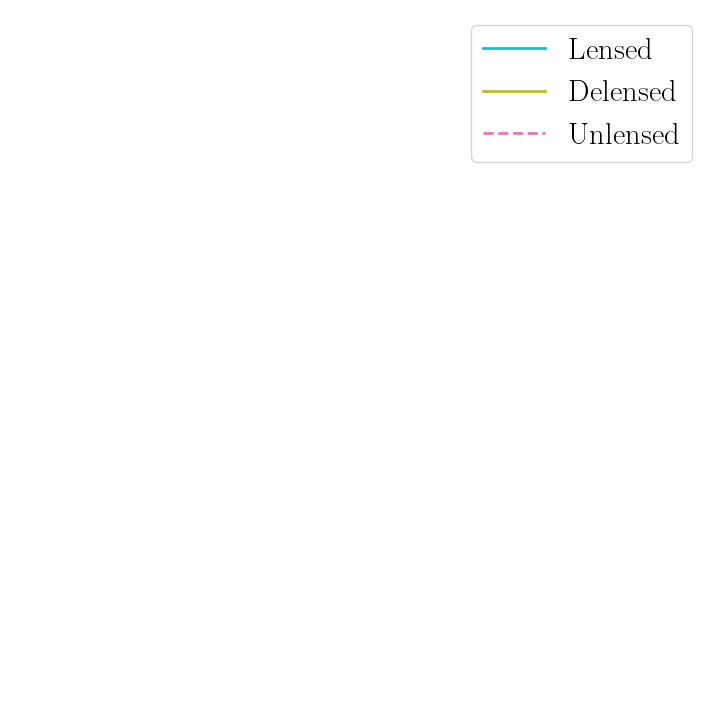

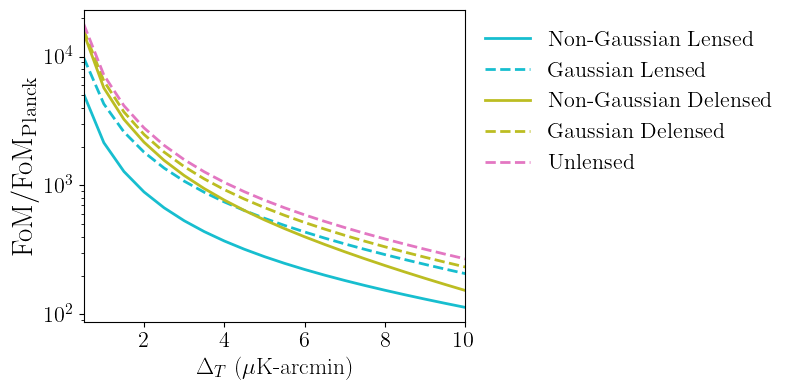

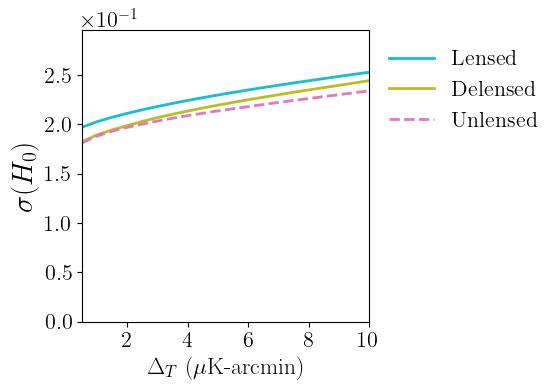

In [51]:
with open(output + 'error_dictionary.pkl', "rb") as fp:
    error_dictionary = pickle.load(fp)
with open(output + 'error_dictionary_bao.pkl', "rb") as fpb:
    error_dictionary_bao = pickle.load(fpb)

# This generates the plots from the error dictionaries
for bao in range(1):
    print('BAO: ' + str(bao))
    count = 0 
    for omega_c_h2 in range(fixingParams.count('omega_c_h2')+1):
        for omega_b_h2 in range(fixingParams.count('omega_b_h2')+1):
            for N_eff in range(fixingParams.count('N_eff')+1):
                for A_s in range(fixingParams.count('A_s')+1):
                    for n_s in range(fixingParams.count('n_s')+1):
                        for H0 in range(fixingParams.count('H0')+1):
                            for mnu in range(fixingParams.count('mnu')+1):
                                for varying_alpha in range(fixingParams.count('varying_alpha')+1):
                                    for varying_me in range(fixingParams.count('varying_me')+1):   
                                        for log10z_c in range(fixingParams.count('log10z_c')+1):   
                                            for fEDE in range(fixingParams.count('fEDE')+1):   
                                                for thetai_scf in range(fixingParams.count('thetai_scf')+1):  
                                                    for omk in range(fixingParams.count('omk')+1):  
                                                        for N_idr in range(fixingParams.count('N_idr')+1):  
                                                            for Gamma_0_nadm in range(fixingParams.count('Gamma_0_nadm')+1):  
                                                                count += 1

                                                                paramsToFix = []
                                                                folder = 'fixed-'
                                                                if omega_c_h2 == 1:
                                                                    paramsToFix.append('omega_c_h2')
                                                                if omega_b_h2 == 1:
                                                                    paramsToFix.append('omega_b_h2')
                                                                if N_eff == 1:
                                                                    paramsToFix.append('N_eff')
                                                                if A_s == 1:
                                                                    paramsToFix.append('A_s')
                                                                if n_s == 1:
                                                                    paramsToFix.append('n_s')
                                                                if H0 == 1:
                                                                    paramsToFix.append('H0')
                                                                if mnu == 1:
                                                                    paramsToFix.append('mnu')
                                                                if varying_alpha == 1:
                                                                    paramsToFix.append('varying_alpha')
                                                                if varying_me == 1:
                                                                    paramsToFix.append('varying_me')
                                                                if log10z_c == 1:
                                                                    paramsToFix.append('log10z_c')
                                                                if fEDE == 1:
                                                                    paramsToFix.append('fEDE')
                                                                if thetai_scf == 1:
                                                                    paramsToFix.append('thetai_scf')
                                                                if omk == 1:
                                                                    paramsToFix.append('omk')
                                                                if N_idr == 1:
                                                                    paramsToFix.append('N_idr')
                                                                if Gamma_0_nadm == 1:
                                                                    paramsToFix.append('Gamma_0_nadm')

                                                                if len(paramsToFix) == 0:
                                                                    paramsToFix = ['']
                                                                
                                                                allGood = 1
                                                                for i in range(len(mustbefixed)):
                                                                    if not (mustbefixed[i] in paramsToFix):
                                                                        allGood = 0
                                                                for i in range(len(mustbeunfixed)):
                                                                    if (mustbeunfixed[i] in paramsToFix):
                                                                        allGood = 0     
                                                                        
                                                                if len(paramsToFix) == 0:
                                                                    paramsToFix = ['']
                                                                    folder += '-'
                                                                else:
                                                                    for x in range(len(paramsToFix)):
                                                                        folder += paramsToFix[x]
                                                                        if x != len(paramsToFix)-1:
                                                                            folder += "-"
                                                                
                                                                if allGood == 1:
                                                                    print("folder: " + output + folder)
                                                                    paramsToPlot = [x for x in columnParameters if x not in paramsToFix]

                                                                    print(str(count) + ', paramsToFix:  ' + str(paramsToFix) + ', paramsToPlot: ' + str(paramsToPlot))
                                                                    biasPlots(paramsToAvoid = ['omega_c_h2','omega_b_h2','A_s','n_s','mnu','tau'], paramsToFix = paramsToFix, output = output + folder, bao = bao,jobNameBias = jobNameLCDM, baoFile = baoFile, cosmoParamsPretty = cosmoParamsPretty, cosmoFid = cosmoFid)
                                                                    print('    biasPlots: ' + output+folder + '/')
                                                                    fisherPlots_LCDM(wantTable = 0, paramsToFix = paramsToFix, output = output + folder, bao = bao, jobNameLCDM = jobNameLCDM, jobNamePlanck = jobNamePlanck, baoFile = baoFile, cosmoParamsPretty = cosmoParamsPretty, paramsToPlot = paramsToPlot)
                                                                    print('    fisherPlots_LCDM: ' + output+folder + '/')
                                                        
print('DONE')
                                        
#(error_dictionary[<fixed>]['metric'][<param>][<quantity_desired>])
#(error_dictionary["['mnu']"]['metric']['H0']['delensed_improvement'])